# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from pylab import rcParams
import os


In [2]:
os.chdir('/home/roman/Documents/Projects/Springboard/8.3 EDA/EDA_human_temperature/data')
df = pd.read_csv('human_body_temperature.csv')

####  1. Is the distribution of body temperatures normal? 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB
None


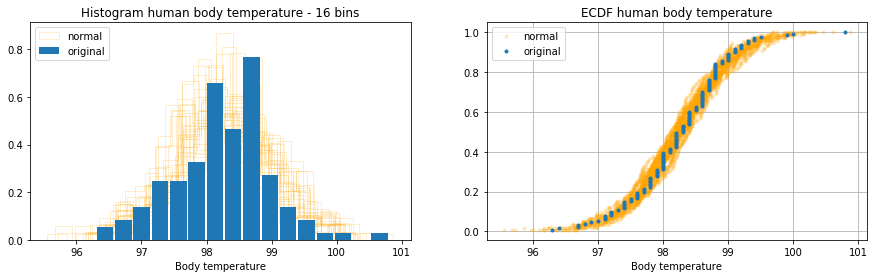

Chi-squared test result (25 runs): mean statistic: 1.4050675171279872 , mean p-value: 1.0
Normal test result:  NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)


In [3]:
print(df.info())

def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data)+1) / len(data)
    return x, y
temp = df['temperature']
x, y = ecdf(temp)
bt_normal, x_normal, y_normal = [], [], []
for i in range(25):
    bt_normal.append(np.random.normal(np.mean(temp), np.std(temp), len(temp)))
    xn, yn = ecdf(bt_normal[i])
    x_normal.append(xn)
    y_normal.append(yn)

rcParams['figure.figsize'] = 15, 4
plt.subplot(1,2,1)
for bt, i in zip(bt_normal, np.arange(len(bt_normal))):
    plt.hist(bt, bins=16, histtype='step', density=True, color='orange', alpha=0.2,\
             label='normal' if i == 1 else '')
plt.hist(temp, bins=16, rwidth=0.9, density=True, label='original')
plt.legend()
plt.xlabel('Body temperature')
plt.title('Histogram human body temperature - 16 bins')
plt.subplot(1,2,2)
index = np.arange
for xn, yn, i in zip(x_normal, y_normal, np.arange(len(x_normal))):
    plt.plot(xn, yn, marker='.', linestyle='none', color='orange', alpha=0.2, \
             label='normal' if i == 1 else '')
plt.plot(x, y, marker='.', linestyle='none', label='original')
plt.legend()
plt.grid()
plt.xlabel('Body temperature')
plt.title('ECDF human body temperature')
plt.show()

#print('Chi-squared result: ', stats.chisquare(df['temperature'], f_exp=bt_normal))
chi_stat, chi_p = [], []
for btn in bt_normal:
    chi_stat.append(stats.chisquare(temp, f_exp=btn).statistic)
    chi_p.append(stats.chisquare(temp, f_exp=btn).pvalue)
print('Chi-squared test result (25 runs): mean statistic: ' + str(np.mean(chi_stat))\
      + ' , mean p-value: ' + str(np.mean(chi_p)))
print('Normal test result: ', stats.normaltest(temp))

While it is difficult to say if the distribution of the human body temperature is normal based on the historgram (bin bias) the ECDF plot suggests that the distribution is at least approximately normal. The actual distribution fits into the range of 25 runs of simulated normal distributions with the same mean and standard deviation.

The Chi-squared test and normality test (based on D’Agostino and Pearson’s) both suggest that the null-hypothesis (= human temperature is not normally distributed) cannot be rejected. This is further evidence for a normal distribution, however, it is not a proof that the body temperature distribution is normal.

#### 2. Is the sample size large? Are the observations independent? 

The sample size is of 130 samples is large (more than 30 samples). Assuming the measurements of body temperature came from different people which are independent of each other within the sample group, the observations are independent

#### 3. Is the true population mean really 98.6 degrees F?
- First, try a bootstrap hypothesis test.
- Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
- In this situation, is it appropriate to use the t or z statistic?
- Now try using the other test. How is the result be different? Why? 

In [4]:
# Bootstrap hypothesis test.
pop_mean = np.float64(98.6)
bs_mean_temp = []
for _ in range(10000):
    bs_mean_temp.append(np.mean(np.random.choice(temp, len(temp))))
p = sum(bs_mean_temp > pop_mean) / len(bs_mean_temp)
print('P-value bootstrap hypothesis test: ' + str(p))

# Use a one-sample statistical test since one sample from a larger population is available.
# Z-statistic is appropriate because large sample size (>30), and the observations are considered independent
# Use the z-test:
sigma = np.std(temp) / np.sqrt(len(temp))
z = (pop_mean - np.mean(temp)) / sigma
p_ztest = 1 - stats.norm.cdf(z)
print('P-value-Z test: ' + str(p_ztest))
# Use the t-test:
df_ = len(temp) - 1
t = (pop_mean - np.mean(temp)) / sigma
p_ttest = 1 -stats.t.cdf(t, df_)
print('P-value-T test: ' + str(p_ttest))

P-value bootstrap hypothesis test: 0.0
P-value-Z test: 2.1761575874634786e-08
P-value-T test: 1.0943732309254273e-07


All tests suggest that the true population mean is < 98.6. The z test gives a P-value of almost 0, the bootstrap test estimates P exactly equal 0. The bootstrap method esstimates exactly 0 because 10,000 runs were not enough to generate one sample with a mean >= 98.6. Had we run ~1e8 bootstrap samples, the occurance of a mean > 98.6 would have been more likely. The result of the t-test is different to the one of the z-test because the t-test assumes a t-distribution of the measurements, while the z-test assumes normal distribution. The t-test is a good approximation for small sample sizes where it cannot be assumed that the measurements are normally distributed. However, in this case, since we have a large sample size we rely on the z-test.

#### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
- Which one is the correct one to use?
- What do you notice? What does this tell you about the difference in application of the t and z statistic?

In [5]:
p_bootstrap, p_ztest, p_ttest = [], [], []
for _ in range(50):
    np.sort(np.random.randint(129, size=10))
    index = []
    while len(index) < 10:
        i = np.random.randint(129)
        if i not in index:
            index.append(i)
    temp_small = temp[np.sort(index)]
    # Use bootstrap method:
    bs_mean_temp_small = []
    for _ in range(10000):
        bs_mean_temp_small.append(np.mean(np.random.choice(temp_small, len(temp))))
    p_bootstrap.append(sum(bs_mean_temp_small > pop_mean) / len(bs_mean_temp_small))
    # Use the z-test:
    sigma = np.std(temp_small) / np.sqrt(len(temp_small))
    z = (pop_mean - np.mean(temp_small)) / sigma
    p_ztest.append(1 - stats.norm.cdf(z))
    # Use the t-test
    df_ = len(temp_small) - 1
    t = (pop_mean - np.mean(temp_small)) / sigma
    p_ttest.append(1 - stats.t.cdf(t, df_))

print('P-value bootstrap hypothesis test: ' + str(np.mean(p_bootstrap)))
print('P-value-Z test: ' + str(np.mean(p_ztest)))
print('P-value-T test: ' + str(np.mean(p_ttest)))

P-value bootstrap hypothesis test: 0.06246199999999999
P-value-Z test: 0.10686589323836047
P-value-T test: 0.1162827432170936


With a total of 50 runs, the t test on average estimates a slighlty higher P-value, than the z-test and bootstrap test. In this case the t-test should be chosen over the z-test since the sample size is small and the central limit theorem does not apply. The P-value is much higher compared to the sample with 130 measurements. This was to be expected because with a smaller sample size there is less certainty of the true population mean.

#### 5. At what temperature should we consider someone's temperature to be "abnormal"?
- As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
- Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws. 

In [6]:
# Bootstrap confidence interval:
bs_CI = np.empty((10000,2))
for i in range(10000):
    bs_CI[i,:] = np.percentile(np.random.choice(temp, len(temp)), [2.5, 97.5])
print('95% confidence interval bootstrap method: ' + str([np.mean(bs_CI[:,0]), np.mean(bs_CI[:,1])]))
# Z-test confidence interval (according to z-table: 95% CI corresponds to z values of -1.96 and 1.96)
h = 1.96 * np.std(temp)
print('95% confidence interval z-test: ' + str([np.mean(temp) - h, np.mean(temp) + h]))

95% confidence interval bootstrap method: [96.76914025, 99.57466674999999]
95% confidence interval z-test: [96.81772952257687, 99.68073201588463]


Human body temperature can be considered abnormal according to the bootsrap sample method (outside the 95% confidence interval) if it is below ~96.8 degrees or abov ~99.6 degrees. The confidence interval with the z-test gives slightly different results (higher minimum abnormal temperature and higher maximum abnormal temperature)

#### 6. Is there a significant difference between males and females in normal temperature?
- What testing approach did you use and why?
- Write a story with your conclusion in the context of the original problem. 

In [7]:
female_temp = df['temperature'][df['gender'] == 'F']
male_temp = df['temperature'][df['gender'] == 'M']
print('mean female body temperature: ' + str(np.mean(female_temp)))
print('mean male body temperature: ' + str(np.mean(male_temp)))
# use permutaion method
m_temp_sim_mean = []
for _ in range(10000):
    t_perm = np.random.permutation(temp)
    m_temp_sim_mean.append(np.mean(t_perm[:len(male_temp)]))
p_perm = sum(m_temp_sim_mean > np.mean(female_temp)) / len(m_temp_sim_mean)

# Use Z-test:
sigma = np.sqrt(np.std(male_temp)**2 / len(male_temp) + np.std(female_temp)**2 / len(female_temp))
z = (np.mean(female_temp) - np.mean(male_temp)) / sigma
p_ztest = 1 - stats.norm.cdf(abs(z))
print('P-value permutation test: ' + str(p_perm))
print('P-value Z-test: ' + str(p_ztest))

mean female body temperature: 98.39384615384614
mean male body temperature: 98.10461538461537
P-value permutation test: 0.0135
P-value Z-test: 0.010633225915055111


The mean body temperature among females is higher than the one among male participants. I therefore test H_0: the mean body temperatures are equal, vs H_A: the female mean body temerature is higher. Both, the permutation sampling test and the z-test suggest that the null hypothesis can be rejected with almost 99% confidence.

In this case, the permutation sampling test is preferable as the z-test relies on the assumption of normal distribution (which is a reasonable assumption given the sample size but nonetheless not the exact distribution).